<a href="https://colab.research.google.com/github/Leneyxis/Machine_Learning/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [4]:
dataset=pd.read_excel("/content/customer_churn_large_dataset.xlsx")
print(dataset.columns)

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')


In [8]:
print(dataset.tail(10))

       CustomerID             Name  Age  Gender     Location  \
99990       99991   Customer_99991   62    Male      Chicago   
99991       99992   Customer_99992   55  Female        Miami   
99992       99993   Customer_99993   44    Male     New York   
99993       99994   Customer_99994   20  Female      Houston   
99994       99995   Customer_99995   47  Female      Houston   
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
99990                           9         36.34             432      0  
99991                          14         73.87             324      1  
99992                          18         45.87             229      0  
999

In [30]:
X = dataset.iloc[:,2:-1]
y = dataset.iloc[:,-1]

       Age  Gender     Location  Subscription_Length_Months  Monthly_Bill  \
0       63    Male  Los Angeles                          17         73.36   
1       62  Female     New York                           1         48.76   
2       24  Female  Los Angeles                           5         85.47   
3       36  Female        Miami                           3         97.94   
4       46  Female        Miami                          19         58.14   
...    ...     ...          ...                         ...           ...   
99995   33    Male      Houston                          23         55.13   
99996   62  Female     New York                          19         61.65   
99997   64    Male      Chicago                          17         96.11   
99998   51  Female     New York                          20         49.25   
99999   27  Female  Los Angeles                          19         76.57   

       Total_Usage_GB  
0                 236  
1                 172  
2  

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=5)
print(y_pred)

[0.50206 0.50407 0.50132 ... 0.48492 0.4943  0.50305]


In [47]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")
r2 = abs(r2_score(y_test, y_pred))
print(f"R-squared (R2): {r2:}")

Mean Squared Error: 0.25
Root Mean Squared Error: 0.50
R-squared (R2): 0.0001317720646130116


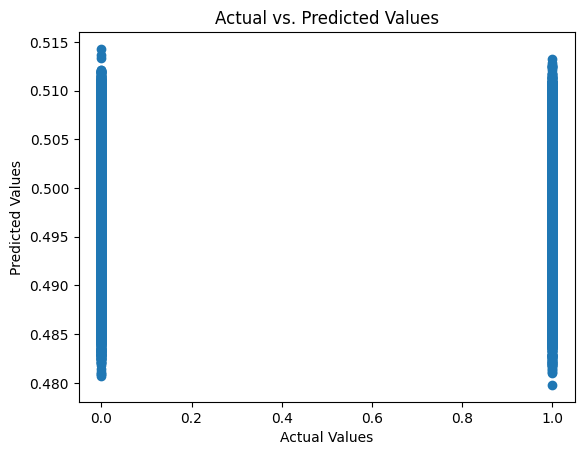

In [45]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()